### Proyecto práctico: arbol de decisión y random forest con scikit-learn

In [24]:
# Importamos librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Usamos
- Car Evaluation Data set de Kaggle
- https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set
- ApiCommand
- kaggle datasets download -d elikplim/car-evaluation-data-set

In [25]:
# Cargamos dataset a utilizar

# 7 caracteristicas
# - buying-price
# - maintenance cost
# - number of doors
# - number of persons
# - lug_boot (equipaje)
# - safety
# - unacc (decision) -> target

# 1727 ejemplos
df_car = pd.read_csv("datasets/car_evaluation.csv", header=None)

### Análisis exploratorio de datos

In [26]:
# Visualizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [27]:
# Analizamos el shape del objeto
print(df_car.shape)

(1728, 7)


In [28]:
# Como podemos observar vamos a renombrar las columnas
col_names = ["buying","maint","doors","persons","lug_boot","safety","class"]
df_car.columns = col_names


In [29]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
# Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [31]:
#Exploremos un poco mas la variable target
df_car["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [32]:
# verificamos valores missings
# no posee valores nulos
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [33]:
# Separamos en X e y
X = df_car.drop(['class'], axis = 1)
y = df_car['class']

In [34]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

# 30 % test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [35]:
#Veamo los resultados
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [36]:
y_train.shape, y_test.shape

((1209,), (519,))

In [37]:
# Veamos que tenemos. Por ejemplo en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [38]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Entrenamiento del modelo de clasificacion con arbol de decision

In [39]:
# Importante: todos nuestros tipos de datos son object,
#realizamos una transformacion
import category_encoders as ce #pip instal category-encoders

In [40]:
#'class',"buying","maint","doors","lug_boot"
encoder = ce.OrdinalEncoder(cols = ["buying","maint","doors","persons","lug_boot","safety"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
# verificamos la transformaciono 
# ¿No se pierde la semantica de cada feature, al ser ya todos numeros?
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [42]:
#Importar arbol de decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

In [43]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [44]:
# Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [45]:
# calculo del accuracy en train
from sklearn.metrics import accuracy_score
#una diferencia
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("El accuracy en train es: ", train_accuracy_tree)
print("El accuracy en test es: ", test_accuracy_tree)


El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.7591522157996147


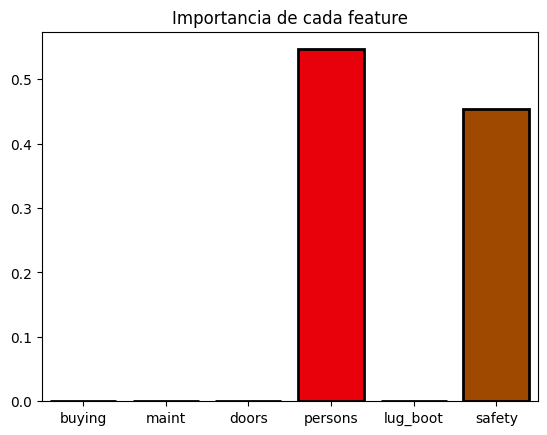

In [46]:
# verificamos el feature importances
import seaborn  as sns
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,palette="bright", saturation=2.0, edgecolor="black",linewidth=2)
plt.title("Importancia de cada feature")
plt.show()

## persons and safety son features importantes

### Entrenamiento de modelo de clasificacion RF

In [48]:
# Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [50]:
# Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

### Evaluacion del modelo de clasificacion RF

In [51]:
# Calculo de metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Train accuracy: ", train_accuracy_rf)
print("Test accuracy: ", test_accuracy_rf)

# hay una ventaja significativa con el random forest
# en vez de usar la estructura de arboles de decision

Train accuracy:  0.9942100909842845
Test accuracy:  0.8863198458574181


In [54]:
# Visualizacion de la importancia de features
# genial cuando crea series parte de la estructura
# de un dataframe
features_scores = pd.Series(
    rf.feature_importances_,
    index = X_train.columns
).sort_values(ascending=False)

features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

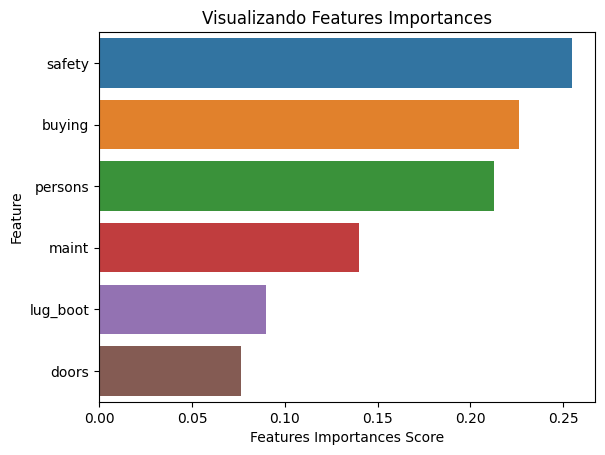

In [55]:
# Grafico de barras
# para acceder al indice coloca solo .index
import seaborn as sns
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel("Features Importances Score")
plt.ylabel("Feature")
plt.title("Visualizando Features Importances")
plt.show()
#ahora es safety y buying los mas importantes

In [58]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print("Confusion Matrix\n", cm)

Confusion Matrix
 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [59]:
# RF classification report
#recall
#f1 scores
#accuracy
#precision
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

